Exploratory Data Analysis + Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_original = pd.read_csv('train.csv')
train_original.drop('Unnamed: 0', inplace=True, axis=1)
train_original.drop('id', inplace=True, axis=1)
train_original.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [28]:
train_original.shape

(103904, 24)

In [29]:
sum(pd.isna(train_original['satisfaction']))

0

Gender: Distribution and Categorical Conversion

<AxesSubplot:>

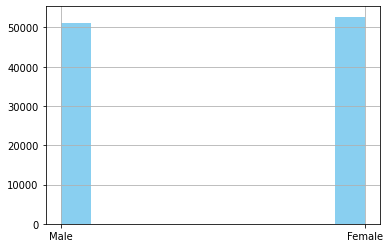

In [30]:
train_original['Gender'].hist(color='#89CFF0')

In [31]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
train_original['Gender'] = train_original['Gender'].apply(transform_gender)

Customer Type: Distribution and Categorical Conversion

<AxesSubplot:>

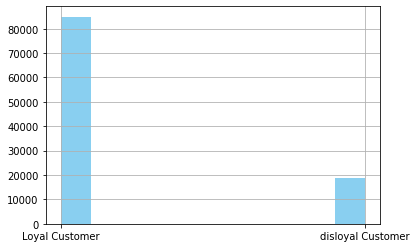

In [32]:
train_original['Customer Type'].hist(color='#89CFF0')

In [33]:
def transform_custype(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
train_original['Customer Type'] = train_original['Customer Type'].apply(transform_custype)

Type of Travel: Distribution and Categorical Conversion

<AxesSubplot:>

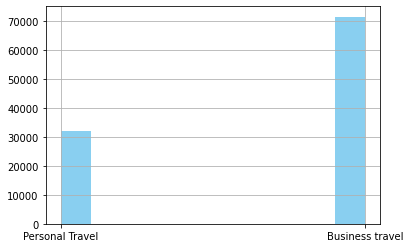

In [34]:
train_original['Type of Travel'].hist(color='#89CFF0')

In [35]:
def transform_tvltype(x):
    if x == 'Personal Travel':
        return 1
    elif x == 'Business travel':
        return 0
train_original['Type of Travel'] = train_original['Type of Travel'].apply(transform_tvltype)

satisfaction (Target Variable): Distribution and Categorical Conversion (Balanced Data)

<AxesSubplot:>

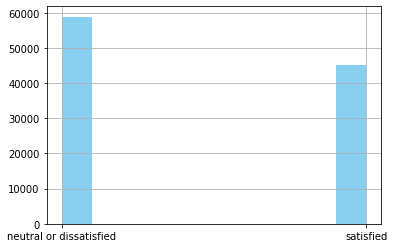

In [36]:
train_original['satisfaction'].hist(color='#89CFF0')

In [37]:
def transform_tgt(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
train_original['satisfaction'] = train_original['satisfaction'].apply(transform_tgt)

Class: Distribution and Categorical Conversion

<AxesSubplot:>

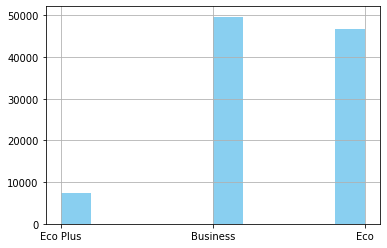

In [38]:
train_original['Class'].hist(color='#89CFF0')

In [39]:
col = ['Class']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(train_original[['Class']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(col))

train_cleaned = pd.concat([train_original, one_hot_df], axis=1)
train_cleaned = train_cleaned.drop(col, axis=1)

train_cleaned

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,1,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0.0,0.0,1.0
1,5047,0,0,25,0,235,3,2,3,3,...,3,1,4,1,1,6.0,0,1.0,0.0,0.0
2,110028,1,1,26,0,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1.0,0.0,0.0
3,24026,1,1,25,0,562,2,5,5,5,...,3,1,4,2,11,9.0,0,1.0,0.0,0.0
4,119299,0,1,61,0,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,0,192,2,1,2,3,...,4,2,3,2,3,0.0,0,0.0,1.0,0.0
103900,73097,0,1,49,0,2347,4,4,4,4,...,5,5,5,4,0,0.0,1,1.0,0.0,0.0
103901,68825,0,0,30,0,1995,1,1,1,3,...,4,5,5,4,7,14.0,0,1.0,0.0,0.0
103902,54173,1,0,22,0,1000,1,1,1,5,...,1,5,4,1,0,0.0,0,0.0,1.0,0.0


In [40]:
train_cleaned.to_csv('train_cleaned.csv')
